In [52]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


C:\Users\lyw\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gamma', 'step', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [53]:
#参数
gamma= 0.6                                            #折现率            
rewardSize=-1 
gridSize=4                                           #网格大小
terminationStates=[[0,0],[gridSize-1,gridSize-1]]   #[0,0]  [3,3]结束位置
actions=[[-1,0],[1,0],[0,1],[0,-1]]                 #对应 上  下  右   左
numIterations=10000                                 #迭代次数

In [54]:
# 初始化
V = np.zeros((gridSize, gridSize))
returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}    #字典
deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}     #字典
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

In [55]:
type(returns)

dict

In [56]:
deltas

{(0, 0): [],
 (0, 1): [],
 (0, 2): [],
 (0, 3): [],
 (1, 0): [],
 (1, 1): [],
 (1, 2): [],
 (1, 3): [],
 (2, 0): [],
 (2, 1): [],
 (2, 2): [],
 (2, 3): [],
 (3, 0): [],
 (3, 1): [],
 (3, 2): [],
 (3, 3): []}

![jupyter](./second.jpg)  

In [57]:
def generateEpisode():
    initState = random.choice(states[1:-1])          #随机选位置，不包括(0,0),(3,3)
    episode = []
    while True:
        if list(initState) in terminationStates:
            return episode
        action = random.choice(actions)                               #随机选运动方向
        finalState = np.array(initState)+np.array(action)             #产生新的位置
        if -1 in list(finalState) or gridSize in list(finalState):    #新位置不存在，用旧的代替
            finalState = initState
        episode.append([list(initState), action,rewardSize, list(finalState)]) #对于每个模拟，我们保存 4 个值
        initState = finalState                                                 #1）初始状态，（2）采取的行动，（3）收到的反馈和（4）最终状态

In [58]:
for it in tqdm(range(numIterations)):   #numIterations
#    episode =[[[0, 2], [0, -1], -1, [0, 1]], [[0, 1], [0, -1], -1, [0, 0]]]
#    episode=[[[0, 1], [-1, 0], -1, [0, 1]], [[0, 1], [1, 0], -1, [1, 1]], [[1, 1], [0, 1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]

    episode=generateEpisode()
    G = 0 
#    print(episode)   
#    print(len(episode))
    for i, step in enumerate(episode[::-1]): #从“经验”数组的末尾开始迭代
            G = gamma*G + step[2]       #step[2]    rewardSize:-1
#            print("G ",G)
#            print("step[0]",step[0])
#            for x in episode[::-1][len(episode)-i:]:
#                print("x[0]",x[0])
            if step[0] not in [x[0] for x in episode[::-1][len(episode)-i:]]:       #这里应该是更新一半路径上的V值
                idx = (step[0][0], step[0][1])      #
#                print("idx ",idx)
                returns [idx].append(G)
                newValue = np.average(returns[idx])                                 #多次迭代取平均
#                print("newValue ",newValue)
                deltas[idx[0], idx[1]].append(np.abs(V[idx[0], idx[1]]-newValue))   #这次迭代与之前迭代的效果差距
                V[idx[0], idx[1]] = newValue                                        #多次之后V最终会稳定下来

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1741.95it/s]


In [59]:
V

array([[ 0.        , -1.63377403, -2.21811748, -2.38807543],
       [-1.6378041 , -2.09878381, -2.27610805, -2.22402435],
       [-2.21705974, -2.28187057, -2.09962676, -1.64079695],
       [-2.38860558, -2.2284136 , -1.64446158,  0.        ]])

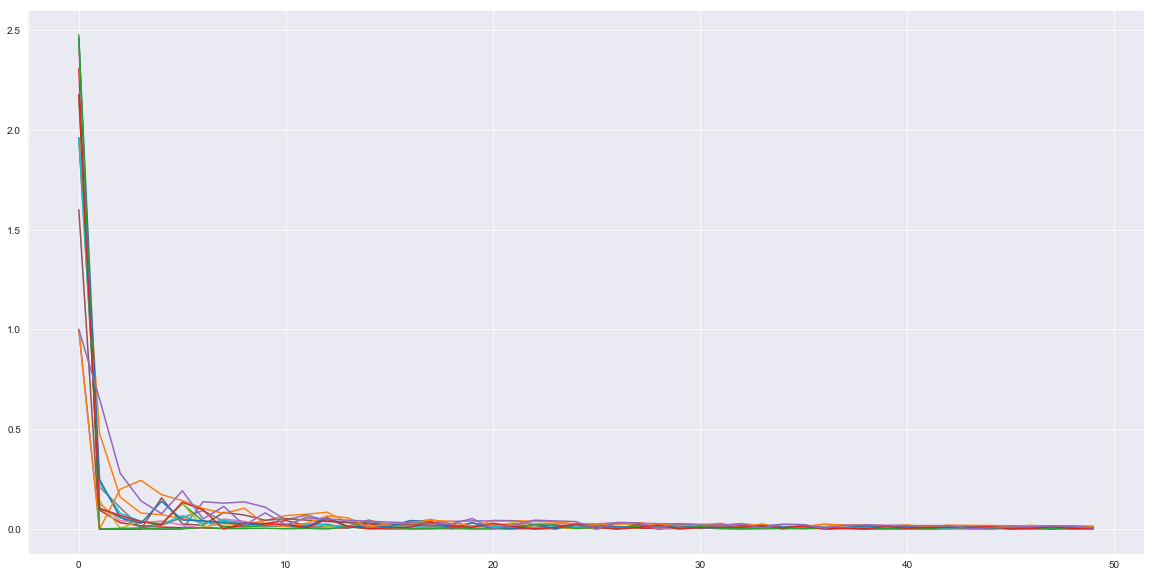

In [60]:
# using gamma = 0.6
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()] 
for series in all_series:
    plt.plot(series)